# Compare hourly averages N07

In [1]:
%%capture
import sys
sys.path.insert(1, '../../../utilities')
#sys.path.insert(1, '../../')
import windspectra, load_alldata
import numpy as np
import matplotlib.pyplot as plt

# For colors
import matplotlib.colors as mcolors
import matplotlib.cm as cm

from scipy import interpolate

#from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
# Provide locations and parameters of data
l_cases = {
    #'amrwind-ksgs-lim':   load_data.AMRWindStats('AmrWind'),
    'naluwind-18':        load_alldata.NaluWindStats('18'),
    'naluwind-19':        load_alldata.NaluWindStats('19'),
    'naluwind-20':        load_alldata.NaluWindStats('20'),
    'naluwind-21':        load_alldata.NaluWindStats('21'),
    'naluwind-22':        load_alldata.NaluWindStats('22'),
    'naluwind-23':        load_alldata.NaluWindStats('23'),
    'Pedersen:2014':      load_alldata.PedersonData('../../pedersen2014_data', skiprows=1,
                                                    ufile='Pedersen2014_N07_velocity.csv',
                                                    tfile='Pedersen2014_N07_temperature.csv'),
}

In [3]:
normalize = mcolors.Normalize(vmin=18.0, vmax=23.0)
# Choose a colormap
#colormap = cm.viridis
colormap = cm.jet 

ccolor = lambda x: colormap(normalize(x))

# What kind of line styles to use in the plots
styles = {
    #'amrwind-ksgs-lim':     {'color':'r',         'lw':2, 'ls':'-',  'plotspectra':True},
    'naluwind-18':          {'color':ccolor(18.0), 'lw':1, 'ls':'-',  'plotspectra':False},
    'naluwind-19':          {'color':ccolor(19.0), 'lw':1,   'ls':'-',  'plotspectra':False},
    'naluwind-20':          {'color':ccolor(20.0), 'lw':1,   'ls':'-',  'plotspectra':False},
    'naluwind-21':          {'color':ccolor(21.0), 'lw':1,   'ls':'-',  'plotspectra':False},
    'naluwind-22':          {'color':ccolor(22.0), 'lw':1,   'ls':'-',  'plotspectra':False},
    'naluwind-23':          {'color':ccolor(23.0), 'lw':2,   'ls':'-',  'plotspectra':False},
    'Pedersen:2014':        {'color':'k',         'lw':3, 'ls':'-',  'plotspectra':False},
}


## Plot velocity profiles

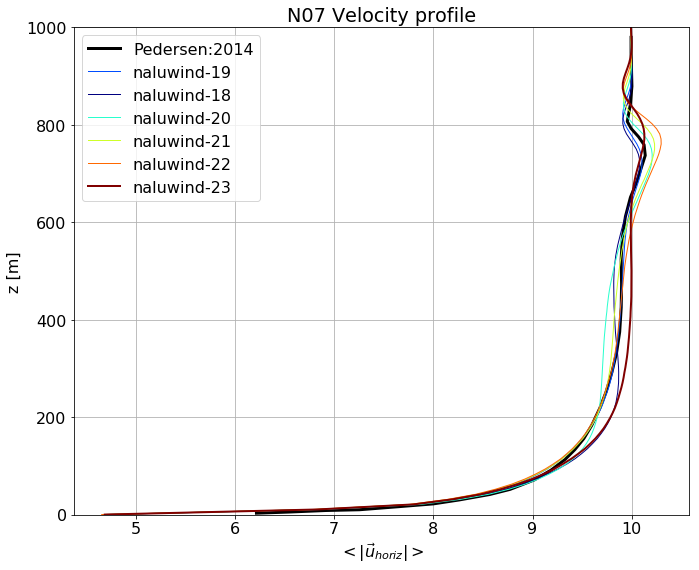

In [4]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

for l,c in l_cases.items():
    ls=styles[l]
    plt.plot(c.hvelmag, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

plt.xlabel(r'$< | \vec{u}_{horiz} | >$')
plt.ylabel('z [m]')
plt.legend(loc=0)
plt.ylim(0,1000)
#plt.ylim(0,100)
plt.grid()
plt.tight_layout()
plt.title('N07 Velocity profile')

## Plot temperature profile

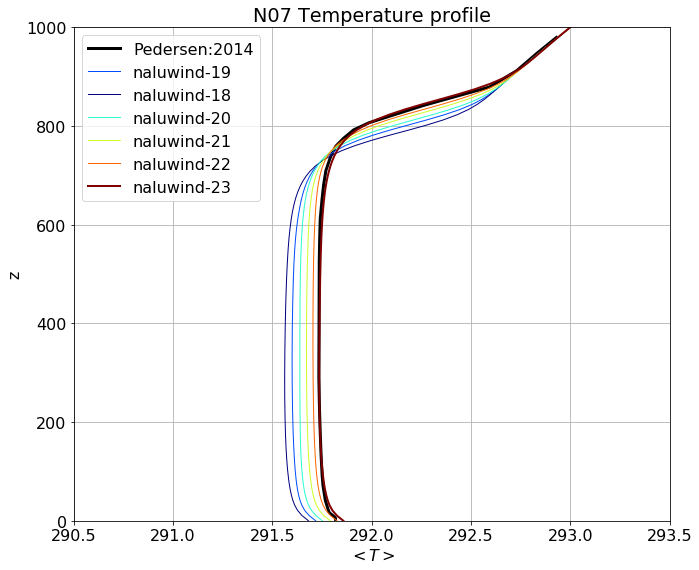

In [5]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

for l,c in l_cases.items():
    ls=styles[l]
    plt.plot(c.T, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
plt.xlabel(r'$<T>$')
plt.ylabel('z')
plt.legend(loc=0)
plt.ylim(0,1000)
plt.xlim(290.5, 293.5)
plt.grid()
plt.tight_layout()
plt.title('N07 Temperature profile')

## Compute L2 difference

In [6]:
maxz = 900 # Don't consider anything above this height

print("%15s %10s %10s"%("Case", "DeltaU_L2", "DeltaT_L2"))
print("%15s %10s %10s"%("====", "=========", "========="))
    
for l,c in l_cases.items():
    #print('case = %s'%l)
    Uinterp = interpolate.interp1d(c.z, c.hvelmag)
    Tinterp = interpolate.interp1d(c.z, c.T)
    # compare with Pedersen
    refc=l_cases['Pedersen:2014']
    Udiff = []
    Tdiff = []
    for zi, z in enumerate(refc.z):
        if z < maxz:
            deltaz = refc.z[zi+1]-z
            Udiff.append((refc.hvelmag[zi]-Uinterp(z))*deltaz)
            Tdiff.append((refc.T[zi]-Tinterp(z))*deltaz)
    L2U = np.linalg.norm(np.array(Udiff))
    L2T = np.linalg.norm(np.array(Tdiff))
    print("%15s %10f %10f"%(l, L2U, L2T))
        

           Case  DeltaU_L2  DeltaT_L2
           ====  =========  =========
  Pedersen:2014   0.000000   0.000000
    naluwind-19   7.676286  24.133934
    naluwind-18  13.697920  30.744960
    naluwind-20  16.229383  18.019942
    naluwind-21  11.706799  11.420033
    naluwind-22  15.106189   5.737607
    naluwind-23  18.190586   2.100908


# Comparison of "best" runs

In [7]:
# Provide locations and parameters of data
b_cases = {
    #'amrwind-ksgs-lim':   load_data.AMRWindStats('AmrWind'),
    'amrwind-ksgs':       load_alldata.AMRWindStats('../../AmrWindKsgs'),
    'naluwind-24hr':        load_alldata.NaluWindStats('23'),
    'Pedersen:2014':      load_alldata.PedersonData('../../pedersen2014_data', skiprows=1,
                                                    ufile='Pedersen2014_N07_velocity.csv',
                                                    tfile='Pedersen2014_N07_temperature.csv'),
}

b_styles = {
    'amrwind-ksgs':         {'color':'r',     'lw':2,   'ls':'-',  'plotspectra':False},
    'naluwind-24hr':          {'color':'b',     'lw':2,   'ls':'-',  'plotspectra':False},
    'Pedersen:2014':        {'color':'k',     'lw':3,   'ls':'-',  'plotspectra':False},
}


## Plot velocity profiles

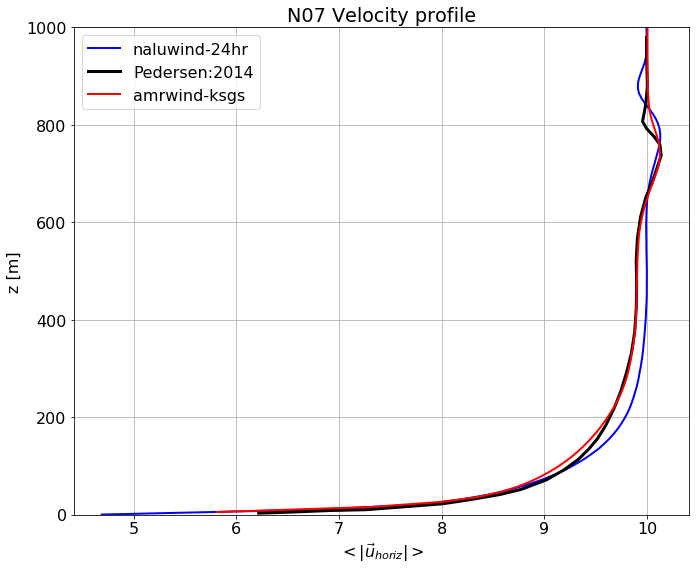

In [8]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

for l,c in b_cases.items():
    ls=b_styles[l]
    plt.plot(c.hvelmag, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

plt.xlabel(r'$< | \vec{u}_{horiz} | >$')
plt.ylabel('z [m]')
plt.legend(loc=0)
plt.ylim(0,1000)
#plt.ylim(0,100)
plt.grid()
plt.tight_layout()
plt.title('N07 Velocity profile')

## Plot temperature profiles

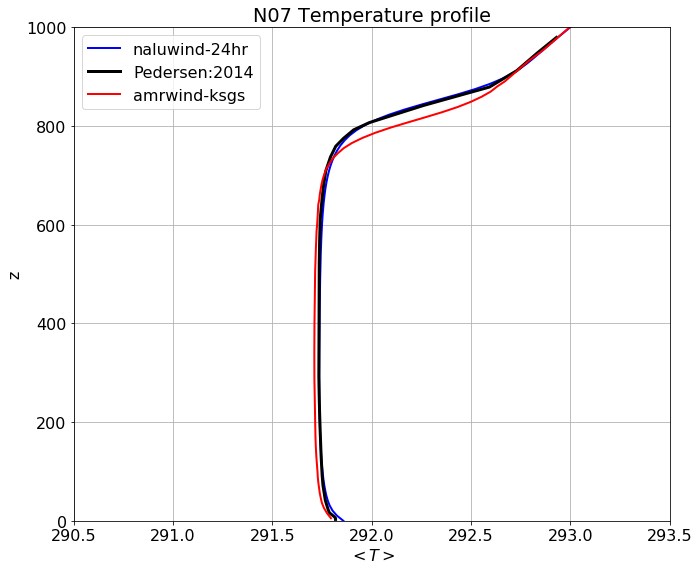

In [9]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

for l,c in b_cases.items():
    ls=b_styles[l]
    plt.plot(c.T, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
plt.xlabel(r'$<T>$')
plt.ylabel('z')
plt.legend(loc=0)
plt.ylim(0,1000)
plt.xlim(290.5, 293.5)
plt.grid()
plt.tight_layout()
plt.title('N07 Temperature profile')